In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io
import requests

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path ="/content/sample_data/cardio_train.csv"
df = pd.read_csv(path,sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Original Data Processing And Cleaning By Abdallah Mahmoud Elsayed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

print(f"Number of columns: { df.shape[1] }")
print()
print(f"Number of rows: { df.shape[0] }")
print()

#Checking if there's NULL value in any of the cells
df.info()

Number of columns: 13

Number of rows: 70000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# converting age to years
df['age'] = round(df['age']/365.25,2)

In [7]:
# converting gender column for data splitting
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)

In [8]:
# Checking if there ary any duplicates in our rows and printing the duplicated rows count.
df.duplicated().sum()

75

In [9]:
# Dropping all duplicated rows.
df.drop_duplicates(inplace=True)

In [10]:
# Calculating BMI
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

In [11]:
# Quick statistics over dataframe
df.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000,69925.000000
mean,53.302892,0.650268,0.349732,164.358699,74.215407,27.560388,128.826314,96.648538,1.367222,1.226671,0.088223,0.053829,0.803661,0.499979
std,6.755908,0.476889,0.476889,8.213453,14.399663,6.093355,154.093668,188.572745,0.680480,0.572490,0.283621,0.225682,0.397231,0.500004
min,29.560000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.360000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.940000,1.000000,0.000000,165.000000,72.000000,26.400000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.390000,1.000000,1.000000,170.000000,82.000000,30.230000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.920000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [ ]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()

normal      38937
high 1      15378
high 2      15021
elevated      419
high 3         77
Name: bp_cat, dtype: int64

In [ ]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [ ]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


2. data analysis

In [ ]:
base_color = sb.color_palette()[0]

In [ ]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

''

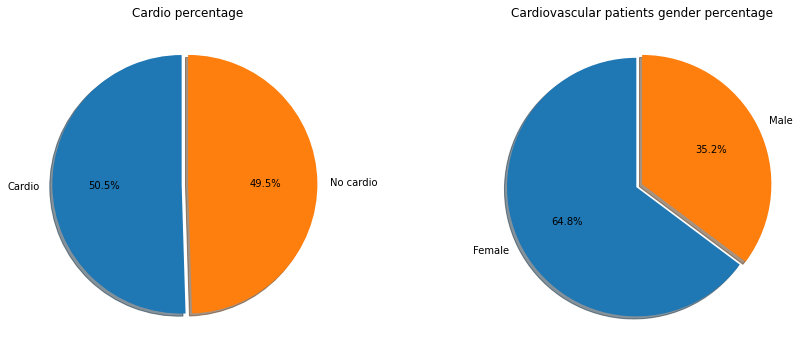

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

''

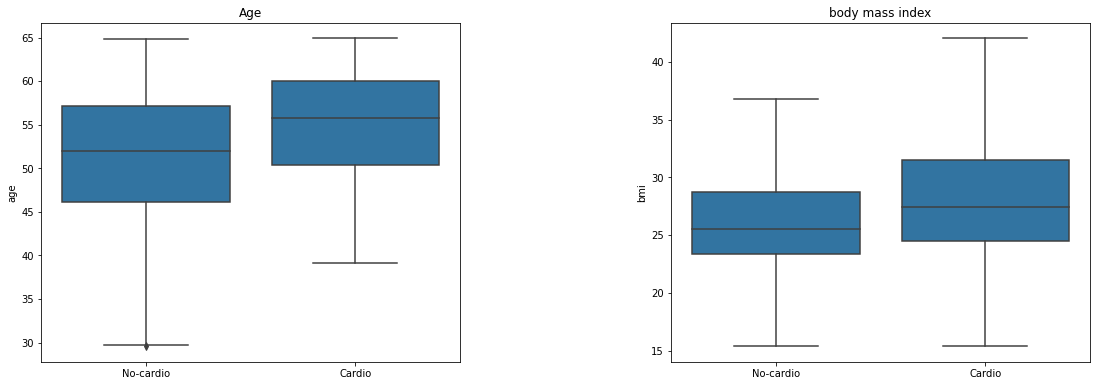

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
;

''

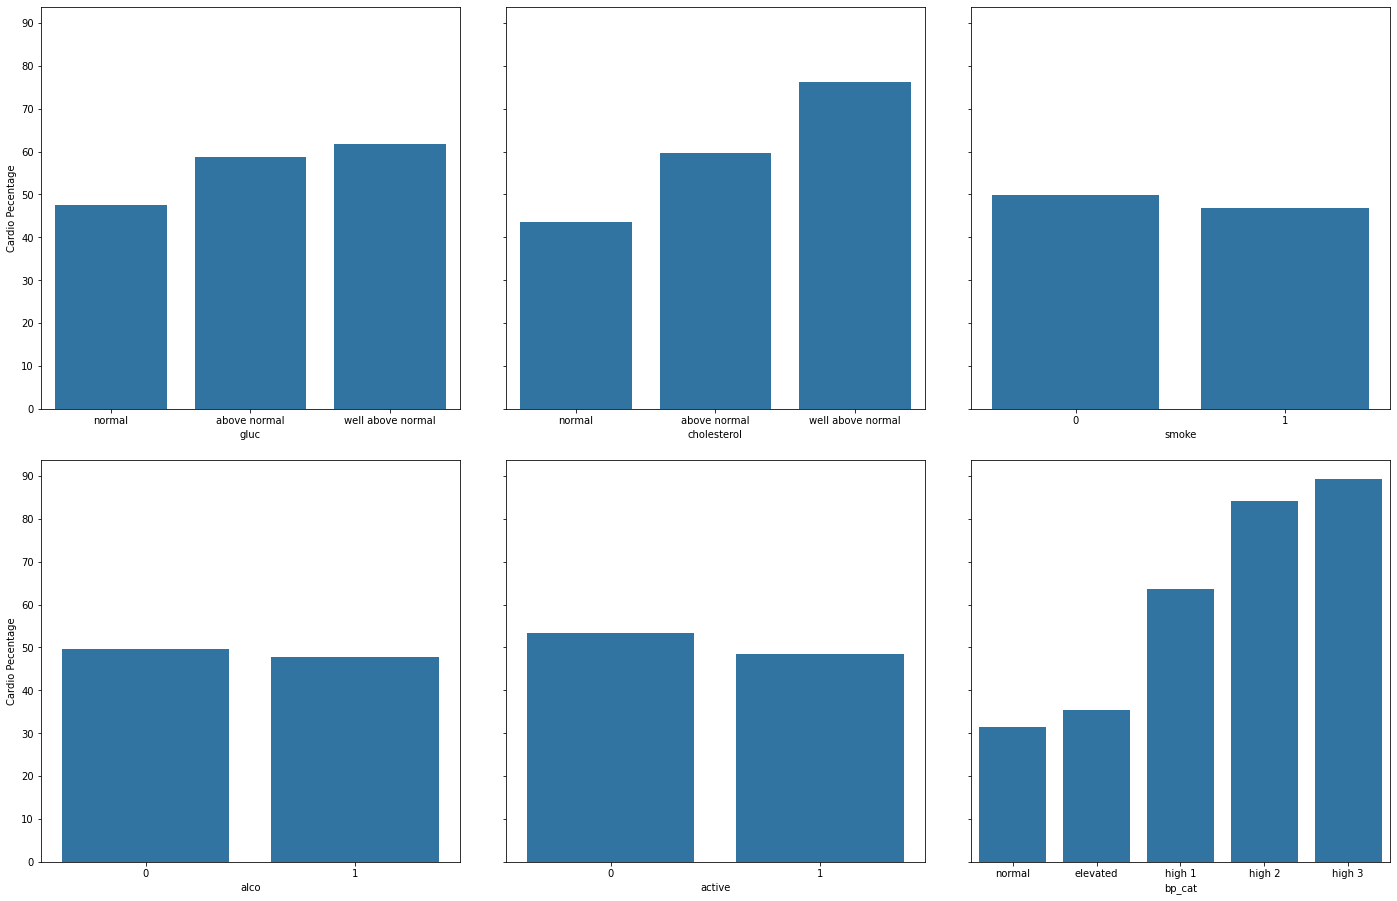

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sb.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = df.groupby('cholesterol').mean()
sb.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = df.groupby('smoke').mean()
sb.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = df.groupby('alco').mean()
sb.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = df.groupby('active').mean()
sb.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = df.groupby('bp_cat').mean()
sb.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Pecentage')
;

Prob and Stats

In [ ]:
df_age_50 = df.query('age >=50')
df_agy_50_cardio = df_age_50.query('cardio==1')
round(df_agy_50_cardio.shape[0]*100/df_age_50.shape[0],2)

55.46

In [ ]:
df_bmi37 = df.query('bmi >=37')
df_bmi37_cardio = df_bmi37.query('cardio ==1')
round(df_bmi37_cardio.shape[0]*100/df_bmi37.shape[0],2)

68.78

In [ ]:
df_high3 = df.query("bp_cat == 'high 3'")
df_high_cardio = df_high3.query('cardio == 1')
round(df_high_cardio.shape[0]*100/df_high3.shape[0],2)

89.29

In [ ]:
df_cohol_smoke = df.query("alco==1 or smoke==1")
print(df_cohol_smoke.shape[0]*100/df.shape[0])

11.53756450249264


In [ ]:
df_cohol_smoke_cadrio = df_cohol_smoke.query('cardio==1')
df_cohol_smoke_cadrio.shape[0]*100/df_cohol_smoke.shape[0]

47.95957043588124

In [ ]:
df_not_active = df.query('active==0')
df_not_active_cardio = df_not_active.query('cardio==1')
df_not_active_cardio.shape[0]*100/df_not_active.shape[0]

53.28196769891836

# 4. Predicting using Machine Learning

In this stage, we're using Machine Learning (ML) to predict the existence of cardiovascular diseases in patients according to our dataset. As known, there are various Machine Learning (ML) algorithms that are widely used, hence, we're using multiple algorithms and comparing them to each other according to their results.

In the cell below, we're importing libraries that will enable us to use Machine Learning algorithms.<br>Mainly, these are the algorithms that we are using:
- Random Forest Classifier
- Support Vector Classifier
- K Neighbors Classifier
- X Gradient Boost Classifier

We're also using metrics libraries to evaluate our predictions. As for prediction evaluation, we're using the following libraries:
- Accuracy Score
- Confusion Matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


Here, we're dropping the cardio column in our dataset as this will be our target prediction variable.<br>Since Machine Learning understands numerical values only, we're also dropping the blood pressure category column as it's datatype is string.

In [ ]:
X = df.drop(['cardio', 'bp_cat'], axis=1)
y = df['cardio']

We need to split our data in two groups, one is used for training our model and the other is for testing and evaluating.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#check for linearity
m9 = LinearRegression().fit(X, y)
r2_score(m9.predict(X), y)

-2.380601423794895

<hr>

#### 4.1 Random Forest Model

Random Forest Classifier consists of multiple decision trees where each tree in the random forest provides a prediction. The class prediction with the highest votes becomes the right prediction.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png" width="30%">

At this piece of code, we're using our trained model to predict new values.

As we can see in the last output, model accuracy level reached 71.1% where the number of type-one error equals 2642.

<hr>

In [ ]:
rrfp = {'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [55,51]}

In [ ]:
rrfm = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions = rrfp,
                              n_iter = 100,
                              cv = 5, verbose=0,
                              random_state=0,
                              n_jobs = -1)

In [ ]:
rrfm.fit(X_train, y_train)
;

''

In [ ]:
rrfm.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 51}

Here, we're creating a model through our classifier and training it.

In [ ]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


In [ ]:
random_model = RandomForestClassifier(n_estimators=51,
                          max_depth=10,
                          random_state=0)

random_model.fit(X_train, y_train)
print(f"Testing accuracy: {round(accuracy_score(random_model.predict(X_test), y_test),4)*100}%")
print(f"Average testing accuracy: {round(cross_validate(random_model, X, y, cv=5)['test_score'].mean()*100,2)}%")

Testing accuracy: 73.26%
Average testing accuracy: 73.44%


''

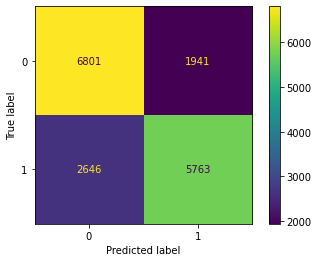

In [ ]:
plot_confusion_matrix(random_model, X_test, y_test, values_format='d')
;

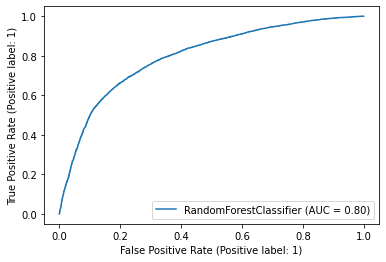

In [ ]:
plot_roc_curve(random_model, X_test, y_test)

#### 4.2 Support Vector Model

In SVC, each data item is plotted in n-dimensional space where n is the number of rows we have in our dataset with the value of the each column in a single row being the value of a particular coordinate in the dimensional space, then, a classification is done by finding the hyper-plane that differentiates the two classes.
<br><br><img width="20%" src="https://miro.medium.com/max/1088/1*6U9NrruycDBsPOyivpn8UQ.png">

Here, we're creating a model and training it.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



In [ ]:
svc_param_grid = {'C': [100,150],  
              'gamma': [0.00001, 0.000001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 
;

''

In [ ]:
grid.best_params_

{'C': 150, 'gamma': 1e-05, 'kernel': 'rbf'}

In [ ]:
# svc_model = SVC(C=100, gamma=0.00001, kernel="rbf", random_state=42)
# svc_cv = cross_validate(svc_model, X, y, cv=5)
# svc_cv

Below, we're using our trained model in order to provide a prediction for new values.

In [ ]:
# svc_cv['test_score'].mean()

In [ ]:
# svc_model.fit(X_train, y_train)
# csv_pred = svc_model.predict(X_train)

In this algorithm, the precision is higher but the type-one error value is higher than the Random Classifier Algorithm that we used before, therefore the overall performance for this model is considered irreliable.

<hr>

#### 4.3 K Neighbors Model

In the K Neighbors Classifier, the algorithm assumes that similar things exists within the same proximity or near each other. The algorithm calculates the distance between the new value and existing values then find the k-nearest neighbors then votes on the predictions.<br>
Ex. in the following picture if we take our K value = 3, then our new class prediction will be predicted as class B, but, if we take K value = 7 then our new class prediction will be predicted as class A.
<br><br><img WIDTH="20%" src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png">

Here, we're also training our model as usual.<br>
**N.B.** By experimenting number of neighbors from 5 to 300 through a for loop, we've found that 200 is the most accurate value.<br>

In [ ]:
# kparams = {'n_neighbors':[5,10],
#           'leaf_size':[1,5],
#           'weights':['uniform', 'distance'],
#           'algorithm':['auto']}

# kparams = {'n_neighbors':[300],
#           'leaf_size':[1],
#           'weights':['uniform'],
#           'algorithm':['ball_tree']}

In [ ]:
# krsv = RandomizedSearchCV(KNeighborsClassifier(),
#                               param_distributions = kparams,
#                               n_iter = 100,
#                               cv = 5, verbose=3,
#                               random_state=0,
#                               n_jobs = 7)

In [ ]:
# krsv.fit(X_train, y_train)

In [ ]:
# krsv.best_params_

In [ ]:
k_model = KNeighborsClassifier(weights = 'uniform',
                               n_neighbors = 300,
                               leaf_size = 1,
                               algorithm = 'ball_tree')
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=300)

In [ ]:
cross_validate(k_model, X, y, cv=5)['test_score'].mean()

0.7223550098665557

After training our model, we need to predict new values.

score: 71.91%


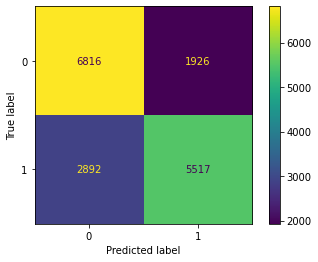

In [ ]:
k_pred = k_model.predict(X_test)
print(f"score: {round((accuracy_score(k_pred, y_test)*100),2)}%")
plot_confusion_matrix(k_model, X_test, y_test, values_format='d')

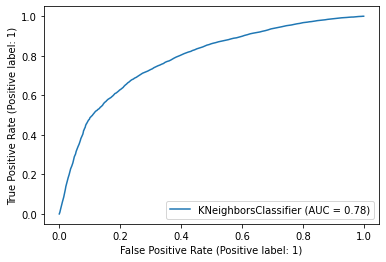

In [ ]:
plot_roc_curve(k_model, X_test, y_test)

As shown in the results, the precision in this algorithm is higher than SVC, however, type-one error is still higher than Random Forest Classifier algorithm.

<hr>

#### 4.4 X Gradient Boost

Just like Random Forest Classifier, the XGB classifier uses a decision-tree algorithm but also with a gradient boosting framework. Rather than training all of the models in isolation of one another, boosting trains models in succession, with each new model being trained to correct the errors made by the previous ones.<br><br><img width="20%" src="https://miro.medium.com/max/461/1*A9myadIB_CqJv-EJA-G_bA.png">

As usual, we're training our model.

In [ ]:
# ROUND 1
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 0.1],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# ROUND 2
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.6, 0.5, 0.7],
#     'gamma': [0.25],
#     'reg_lambda': [50.0, 100, 150],
#     'scale_pos_weight': [3]
# }

# ROUND 3
# param_grid = {
#     'max_depth': [3],
#     'learning_rate': [0.6, 0.5, 0.7],
#     'gamma': [0.25],
#     'reg_lambda': [50.0, 100, 150],
#     'scale_pos_weight': [3]
# }

# ROUND 4  
# param_grid= = {
#     'max_depth': [3],
#     'learning_rate': [0.6, 0.65, 0.55],
#     'gamma': [0.25],
#     'reg_lambda': [40.0, 50.0, 60.0],
#     'scale_pos_weight': [3]
# }

## Winner Winner Chicken Dinner!!!!!
# param_grid={'gamma': [0.24],
#  'learning_rate': [.13],
#  'max_depth': [5],
#  'reg_lambda': [50],
#     'n_estimators': [150]}

In [ ]:
# optimal_params = GridSearchCV(
#     estimator=XGBClassifier(objective="binary:logistic",
#                             seed=0,
#                             subsample=0.9),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=1,
#     n_jobs=7,
#     cv=5
# )

In [ ]:
# optimal_params.fit(
#                 X_train, 
#                 y_train, 
#                 verbose=False,
#                 early_stopping_rounds=10,
#                 eval_metric='aucpr',
#                 eval_set=[(X_test, y_test)])

In [ ]:
# optimal_params.best_params_

In [ ]:
boost_model = XGBClassifier(verbosity=0, seed=0, n_estimators=150,
                            gamma= 0.24, max_depth=4, learning_rate=0.13,
                            reg_lambda=50.0, scale_pos_weight=1)

boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)
print(f"Testing accuracy: {round((accuracy_score(boost_pred, y_test)*100),2)}%")
xgb_cross = cross_validate(boost_model, X, y, cv=11)
print(f"Average testing accuracy: {round((xgb_cross['test_score'].mean()*100),4)}%")

Testing accuracy: 73.11%
Average testing accuracy: 73.5999%


Again, we're predicting our new values.

''

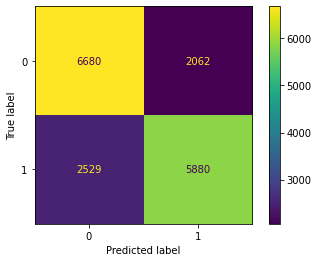

In [ ]:
plot_confusion_matrix(boost_model, X_test, y_test, values_format='d')
;

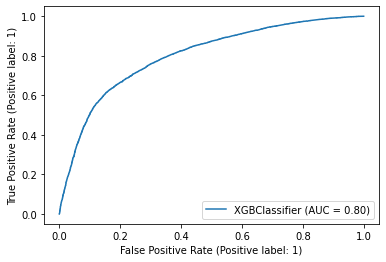

In [ ]:
plot_roc_curve(boost_model, X_test, y_test)

As seen in the output, the accuracy score is the highest of all models used before, however, type-one error equals 2728.

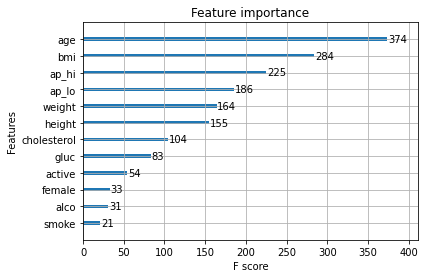

In [ ]:
plot_importance(boost_model)

## Conclusion

To conclude all the previous models that we've used before, a significant variance was found in accuracy score and type-one error. However, accuracy isn't much important compared to type-one error because it would be dangerous if our model classified a cardio patient as a non-cardio patient, so, we must rely on the model with the lowest type-one error value, so, the **XGBoost Classifier is considered as a winner** in such a critical field like health. 

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 3.2 MB/s 
